#### Validating that logistic regression coeffs using gradient descent gives the least loss, comparing the logistic regr coeff with a full grid search

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Data Source: https://archive.ics.uci.edu/ml/datasets/Credit+Approval

In [3]:
bin_data = pd.read_csv('binary_data_sample.csv')


In [4]:
bin_data.head()

,x1,x2,x3,x4,y
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


Defining cross entropy

In [5]:
def get_cross_entropy(w1, w2):
    exp_val = np.exp(-1*(w1*bin_data['x1'] + w2*bin_data['x2']))
    y_hat = (1/(1+exp_val))
    y=bin_data['y']
    cross_entropy = -1*(y* np.log(y_hat) + (1-y)*np.log(1-y_hat)) ## -y log(y_hat ) - (1-y)*log(1-y_hat)
    return(cross_entropy.sum())

Doing a full grid search for w1 and w2 in ranges -5 to +5 and getting cross entropy

In [6]:
%%time
L=[]
for w1 in np.arange(-5,5,0.1):
    for w2 in np.arange(-5,5,0.1):
        L.append([w1,w2,get_cross_entropy(w1, w2)])

c_entropy = pd.DataFrame(L)
c_entropy.columns=['x1','x2','loss']

c_entropy.shape

/Users/z003cbx/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


CPU times: user 12.3 s, sys: 73.8 ms, total: 12.4 s
Wall time: 12.5 s


In [7]:
c_entropy.head()

,x1,x2,loss
0,-5.0,-5.0,3954.095915
1,-5.0,-4.9,3827.996431
2,-5.0,-4.8,3703.746547
3,-5.0,-4.7,3581.441686
4,-5.0,-4.6,3461.137765


In [8]:
c_entropy.shape

(10000, 3)

In [9]:
c_entropy.replace([np.inf, -np.inf], np.nan, inplace=True)
c_entropy.dropna(inplace=True)

In [10]:
c_entropy.shape

(6823, 3)

As we can see, only 6823 of 10000 samples have loss that is not inf. We are calculating the loss in areas that we absolutely don't need to

In [12]:
from mpl_toolkits.mplot3d import Axes3D


#### The coefficients with minimum loss:

In [13]:
c_entropy[c_entropy['loss']==c_entropy['loss'].min()]

,x1,x2,loss
4048,-1.0,-0.2,377.091936


In [14]:
clf =LogisticRegression()

clf.fit(bin_data[['x1', 'x2']], bin_data['y'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [15]:
clf.coef_

array([[-1.10475997, -0.27099925]])

## The coefficients from Logistic Regression is -1.1 and -0.27, while we observed that the min loss is at -1.0 and -0.2, which is within the range of our min increment; 
Hence, cross-entropy loss minimization of gradient descent is validated from full grid search

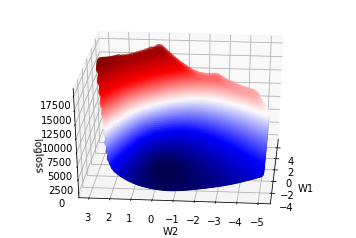

In [19]:
# plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(c_entropy['x1'], c_entropy['x2'], c_entropy['loss'], c=c_entropy['loss'], s=60, cmap='seismic')
ax.view_init(30, 185)
ax.set_xlabel('W1')
ax.set_ylabel('W2')
ax.set_zlabel('logloss')

plt.show()


As the 3-d plot isn't clear w.r.t to the convexity, checking it in 2-d projections

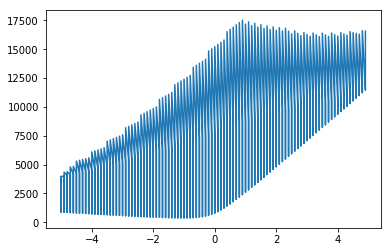

In [21]:
plt.plot(c_entropy['x1'], c_entropy['loss'])

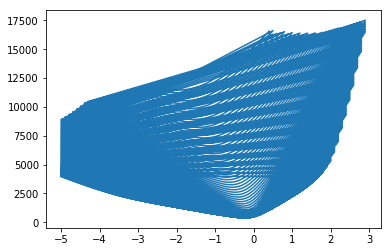

In [22]:
plt.plot(c_entropy['x2'], c_entropy['loss'])

Above 2 plots give us an idea of the 3-d contour. We can  see the convexity of the 3-d plot from these two plots above

Also re-doing it with only one axis, to get a clear view of the plot

In [23]:
def get_cross_entropy_x1(w1):
    exp_val = np.exp(-1*(w1*bin_data['x1'] ))
    y_hat = (1/(1+exp_val))
    y=bin_data['y']
    cross_entropy = -1*(y* np.log(y_hat) + (1-y)*np.log(1-y_hat)) ## -y log(y_hat ) - (1-y)*log(1-y_hat)
    return(cross_entropy.sum())

In [24]:
%%time
L=[]
for w1 in np.arange(-10,10,0.1):
    L.append([w1,get_cross_entropy_x1(w1)])

c_entropy_x1 = pd.DataFrame(L)
c_entropy_x1.columns=['w1','loss']

c_entropy_x1.shape

/Users/z003cbx/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


CPU times: user 225 ms, sys: 3.49 ms, total: 229 ms
Wall time: 228 ms


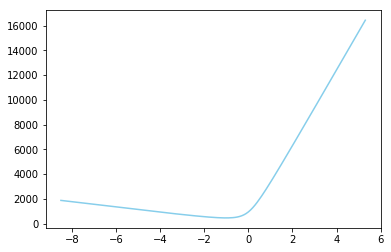

In [25]:
# plot
fig = plt.figure()
##ax = fig.add_subplot(111, projection='3d')
plt.plot(c_entropy_x1['w1'], c_entropy_x1['loss'], c='skyblue')
plt.show()


We can clearly see the parabolic nature of the cross-entropy loss, though the shape isn't 'symmetric'. The convexity is clearly seen here. 

In [26]:
clf2 =LogisticRegression()

clf2.fit(bin_data[['x1']], bin_data['y'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [27]:

clf2.coef_

array([[-1.00843697]])

In [28]:
c_entropy_x1[c_entropy_x1['loss']==c_entropy_x1['loss'].min()]

,w1,loss
90,-1.0,464.347187


#### With only one feature, we can see that a grid-search gave us -1. as coefficient, same as of LogisticRegression!!

How stable is this loss function contour, if we add/remove a few data points? To check the 'generalizing' nature

In [43]:
def get_cross_entropy_sampled_x1(w1):
    exp_val = np.exp(-1*(w1*bin_data['x1'] ))
    y_hat = (1/(1+exp_val))
    y=bin_data['y']
    ## Sampling 10 times and calculating cross-entropy in each iteration
    ce=[]
    for i in range(10):
        rand_idx = np.random.randint(0, len(y), size=int(0.8*len(y)))
        y_samp = y[rand_idx]
        y_hat_samp=y_hat[rand_idx]
        ce_samp=-1*(y_samp* np.log(y_hat_samp) + (1-y_samp)*np.log(1-y_hat_samp)) 
        ce.append(ce_samp.sum())
    return(ce)

In [47]:
%%time
L=[]
for w1 in np.arange(-10,10,0.1):
    L.append([w1,get_cross_entropy_sampled_x1(w1)])


/Users/z003cbx/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


CPU times: user 5.79 s, sys: 16.3 ms, total: 5.81 s
Wall time: 5.83 s


In [65]:

c_entropy_x1 = pd.DataFrame(L)
c_entropy_x1.columns=['w1','loss']
c_entropy_x1 = pd.DataFrame(c_entropy_x1['loss'].values.tolist(), index= c_entropy_x1.w1).reset_index()


In [67]:
c_entropy_x1.head()

,w1,0,1,2,3,4,5,6,7,8,9
0,-10.0,inf,1300.580930,1606.612592,1727.109033,inf,inf,inf,2141.812416,1610.299683,inf
1,-9.9,inf,1463.235583,inf,1814.266984,1734.790937,inf,1556.667359,1757.534898,1578.337697,1679.461000
2,-9.8,inf,1219.643450,inf,inf,1773.363790,inf,1456.949062,inf,inf,inf
3,-9.7,inf,1514.139101,1807.532494,inf,inf,1823.666612,inf,inf,1837.752978,inf
4,-9.6,1712.426706,inf,1401.133085,1731.665252,inf,1552.071114,1943.167942,inf,inf,inf


In above table, w1 is the coefficient and each col represents the loss value, while 20% of samples are randomly knocked out. We can see that the loss value varies each time. We can convert all inf values to nans for plotting convenience

In [70]:
c_entropy_x1.replace([np.inf, -np.inf], np.nan, inplace=True)

In [79]:
import matplotlib.cm as cm
colors = cm.rainbow(np.linspace(0, 1, 10))


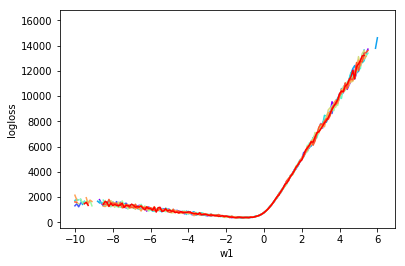

In [82]:
# plot
fig = plt.figure()
##ax = fig.add_subplot(111, projection='3d')
for i in range(10):
    plt.plot(c_entropy_x1['w1'], c_entropy_x1[i], c=colors[i])

plt.xlabel('w1')
plt.ylabel('logloss')
plt.show()


From above plot, we can see that the plots are very close to each other, almost overlapping. This means the regression is generalizing well for the given data